# <b/><font color='green'><center>Traffic Sign Classification</center></font>

## <b/> Importing Necessary Libraries

In [1]:
# Import necessary libraries
import os  
import random  
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
import tensorflow as tf  

from matplotlib.image import imread  # Function to read images
from PIL import Image  # Library for image processing

# Import modules for machine learning and neural networks
from sklearn.model_selection import train_test_split  
from tensorflow.keras.utils import to_categorical  
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D  

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

## <b/> Loading Dataset

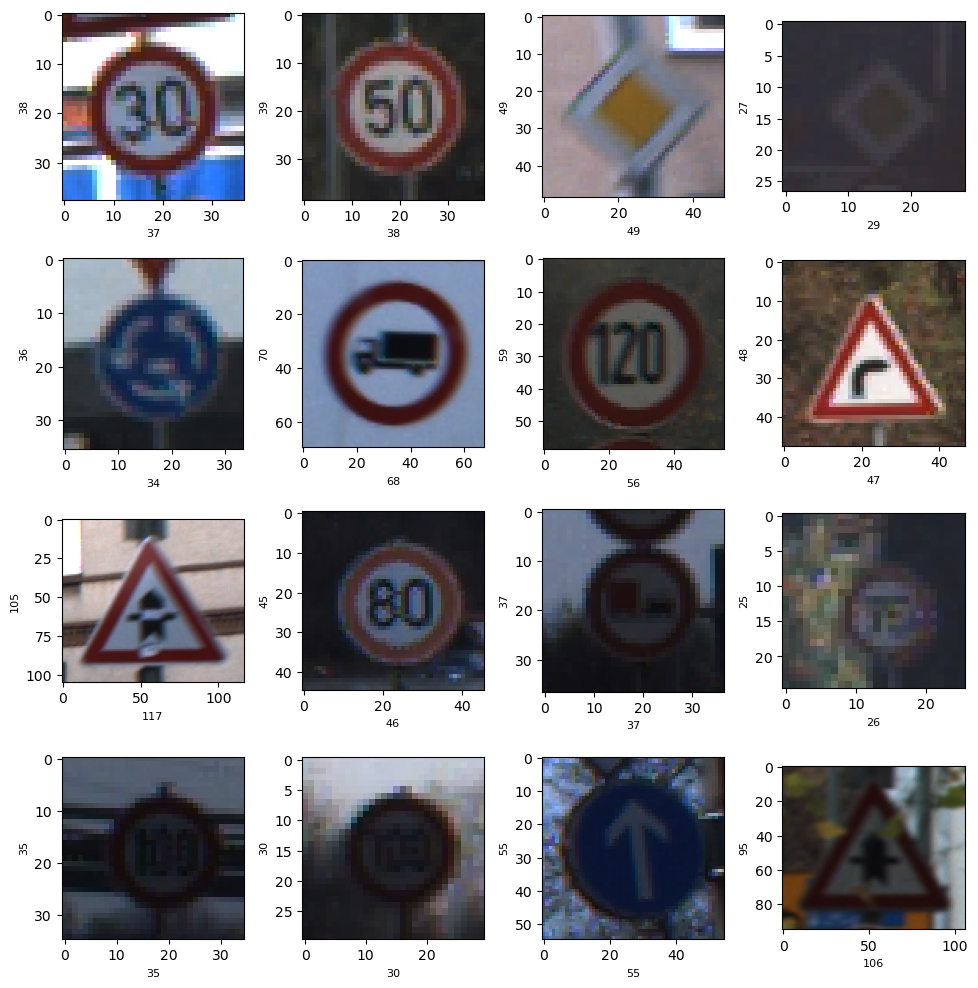

In [2]:
# Plotting 16 images to check the dataset
plt.figure(figsize=(10,10)) 
path = "traffic_sign_dataset/Test"

for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.tight_layout()  # Adjust the layout to prevent overlap
    
    # Select a random image from the directory
    rand_img = imread(path + '/' + random.choice(sorted(os.listdir(path))))
    
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize=8)  # Label the width of the image
    plt.ylabel(rand_img.shape[0], fontsize=8)  # Label the height of the image

## <b/> Resize the Image Dimension

In [3]:
# Initialize lists to store image dimensions
dim1 = []
dim2 = []

# Loop through each class label (0 to 42)
for i in range(0, 43):
    # Define the path to the images for the current label
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

In [4]:
# Print the dimensions
print('Dimension 1 Mean : ', np.mean(dim1), ' Dimension 2 Mean : ', np.mean(dim2))

Dimension 1 Mean :  50.328929582493814  Dimension 2 Mean :  50.83587951745773


In [5]:
# Initialize lists to store images and their corresponding label IDs
images = []
label_id = []

for i in range(43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
        label_id.append(i)

## <b/> Converting Images to Numpy Array

In [6]:
# Convert the list of images to a numpy array
images = np.array(images)

# Normalize the images by dividing by 255 (scale pixel values to [0, 1] range)
images = images / 255

In [7]:
# Convert the list of label IDs to a numpy array
label_id = np.array(label_id)

# Check the shape of the label_id array
label_id.shape

(39209,)

In [8]:
# Check shape
images.shape

(39209, 50, 50, 3)

## <b/> Classes Count

In [9]:
# Create a DataFrame from the label_id array and count the occurrences of each label
label_counts = pd.DataFrame(label_id).value_counts()

# Display the first few counts
label_counts.head()

0 
2     2250
1     2220
13    2160
12    2100
38    2070
Name: count, dtype: int64

## <b/> Splitting the Data

In [10]:
# Split the dataset into training and validation sets
# 80% of the data will be used for training and 20% for validation
X_train, X_val, Y_train, Y_val = train_test_split(images, label_id, test_size=0.2, random_state=42)

## <b/> One Hot Encoding using Keras

In [11]:
# Convert the training labels to one-hot encoded format
Y_train_cat = to_categorical(Y_train)

# Convert the validation labels to one-hot encoded format
Y_val_cat = to_categorical(Y_val)

## <b/> Building ML Model

In [12]:
# Initialize a Sequential model
model = Sequential()

# Add a convolutional layer then a MaxPool2D layer and a Dropout layer
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=X_train.shape[1:], activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

# Add another convolutional layer then a MaxPool2D layer and a Dropout layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

# Flatten the output of the convolutional layers to prepare for the dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))

2024-07-27 00:35:36.000616: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-07-27 00:35:36.001669: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-07-27 00:35:36.001683: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-07-27 00:35:36.001748: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-27 00:35:36.002374: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
# Compile the model with the sparse categorical crossentropy loss function,
# Adam optimizer, and accuracy as the evaluation metric
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 50, 50, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 23, 23, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       991,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,035,627 (3.95 MB)

 Trainable params: 1,035,627 (3.95 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Train the model on the training data
# - `epochs=20`: Number of times the model will iterate over the entire training dataset
# - `batch_size=128`: Number of samples per gradient update
# - `validation_data=(X_val, Y_val)`: Validation data used to evaluate the model performance after each epoch
# - `verbose=2`: Display detailed progress of the training process
model.fit(X_train, Y_train, epochs=20, batch_size=128, validation_data=(X_val, Y_val), verbose=2)

Epoch 1/20


2024-07-27 00:36:02.749350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


246/246 - 17s - 69ms/step - accuracy: 0.2864 - loss: 2.6212 - val_accuracy: 0.6315 - val_loss: 1.3849
Epoch 2/20
246/246 - 14s - 55ms/step - accuracy: 0.5746 - loss: 1.3616 - val_accuracy: 0.8242 - val_loss: 0.6977
Epoch 3/20
246/246 - 14s - 55ms/step - accuracy: 0.6960 - loss: 0.9373 - val_accuracy: 0.9231 - val_loss: 0.4224
Epoch 4/20
246/246 - 14s - 57ms/step - accuracy: 0.7574 - loss: 0.7350 - val_accuracy: 0.9514 - val_loss: 0.2959
Epoch 5/20
246/246 - 14s - 58ms/step - accuracy: 0.7964 - loss: 0.6241 - val_accuracy: 0.9635 - val_loss: 0.2180
Epoch 6/20
246/246 - 14s - 56ms/step - accuracy: 0.8204 - loss: 0.5440 - val_accuracy: 0.9703 - val_loss: 0.1559
Epoch 7/20
246/246 - 14s - 56ms/step - accuracy: 0.8387 - loss: 0.4815 - val_accuracy: 0.9735 - val_loss: 0.1437
Epoch 8/20
246/246 - 15s - 59ms/step - accuracy: 0.8506 - loss: 0.4473 - val_accuracy: 0.9788 - val_loss: 0.1210
Epoch 9/20
246/246 - 14s - 57ms/step - accuracy: 0.8609 - loss: 0.4134 - val_accuracy: 0.9795 - val_loss: 0

## <b/> Visualize Model Training History

<Axes: >

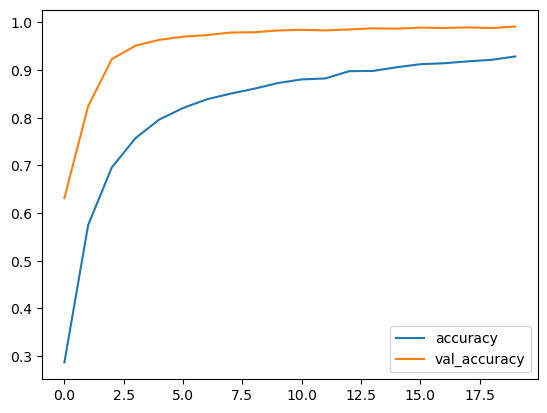

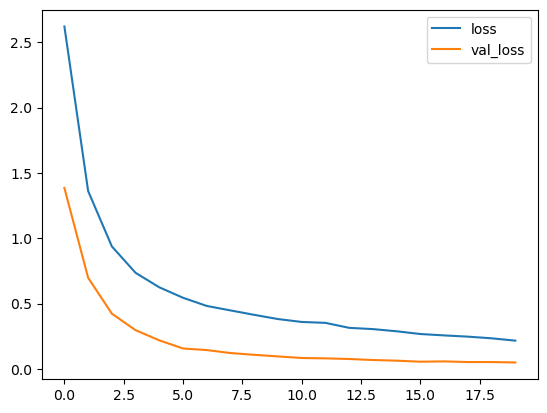

In [15]:
# Convert the training history to a DataFrame for easy analysis
evaluation = pd.DataFrame(model.history.history)

# Plot the training and validation accuracy over epochs
evaluation[['accuracy', 'val_accuracy']].plot()

# Plot the training and validation loss over epochs
evaluation[['loss', 'val_loss']].plot()

#### We can use Regularization or tweak with Dropouts to reduce the overfitting of the model for better training of the model.

## <b/> Model for Test Dataset

In [16]:
# Define the path to the test dataset
test_path = 'traffic_sign_dataset/Test'

## <b/> Scaling the Test Images

In [20]:
# Preprocesses images by resizing and normalizing them
def scaling(test_images, test_path):
    images = []
    image_path = test_images

    for x in image_path:
        img = Image.open(test_path + '/' + x)
        # Resize the image to 50x50 pixels
        img = img.resize((50,50))
        # Convert the image to a numpy array
        img = np.array(img)
        images.append(img)

    # Convert the list of images to a numpy array
    images = np.array(images)
    # Normalize the images by dividing pixel values by 255
    images = images/255

    return images

In [21]:
# Apply the scaling function to preprocess the test images
# - `sorted(os.listdir(test_path))`: List of sorted image file names from the test directory
# - `test_path`: Path to the test image directory
test_images = scaling(sorted(os.listdir(test_path)), test_path)

## <b/> Evaluation on Test Set

In [22]:
# Load the test data from a CSV file into a DataFrame
test = pd.read_csv('traffic_sign_dataset/Test.csv')

# Extract the 'ClassId' column as the ground truth labels for the test set
Y_test = test['ClassId'].values

# Display the test labels
Y_test

array([16,  1, 38, ...,  6,  7, 10])

In [25]:
# Predict the class probabilities for the test images
# - `model.predict(test_images)`: Predict the class probabilities for each image
# - `np.argmax(..., axis=1)`: Convert the probabilities to class labels by selecting the index with the highest probability
Y_pred = np.argmax(model.predict(test_images), axis=1)

# Display the predicted class labels
Y_pred

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


array([16,  1, 38, ..., 38,  7, 10])

## <b/> Storing Labels

In [26]:
# Define a list of all traffic sign labels given in the dataset
all_labels = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)','Speed limit (70km/h)', 
              'Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)','Speed limit (120km/h)','No passing',
              'No passing veh over 3.5 tons','Right-of-way at intersection','Priority road','Yield','Stop','No vehicles',
              'Veh > 3.5 tons prohibited','No entry','General caution','Dangerous curve left','Dangerous curve right', 
              'Double curve','Bumpy road','Slippery road','Road narrows on the right','Road work','Traffic signals','Pedestrians', 
              'Children crossing','Bicycles crossing','Beware of ice/snow','Wild animals crossing', 'End speed + passing limits',
              'Turn right ahead','Turn left ahead','Ahead only','Go straight or right','Go straight or left','Keep right',
              'Keep left','Roundabout mandatory','End of no passing','End no passing veh > 3.5 tons']

## <b/> Visualize the Test Image for prediction

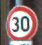

In [27]:
# test image
img = Image.open(test_path + '/00001.png')
img

In [28]:
# original label
print('Original Label : ', all_labels[Y_test[1]])

Original Label :  Speed limit (30km/h)


In [29]:
# predicted label
print('Predicted Label : ', all_labels[Y_pred[1]])

Predicted Label :  Speed limit (30km/h)


----

## Conclusion:
### We started by importing the libraries and loading the dataset, preprocessing it, created the ML model and found out the predictions using that model. During preprocessing we found out that this dataset has 43 classes. Model reached the accuracy of 92% in just 20 epochs, we can further optimize the model using the hyper parameter tuning and reach a higher accuracy.